**Домашнее задание к уроку 3.**

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import datasets

%matplotlib inline

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype = np.float64)
y_pred = np.array([0.1, 0.1, 0.9, 0.2, 0.8, 0.1, 0.9, 0.2, 0.7, 0.8], dtype = np.float64)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def calc_logloss(y, y_pred):
    # y_pred_ = np.array(y_pred).copy()
    # y_pred_ = np.array([y_pred_i if y_pred_i != 0 else 1e-12 for y_pred_i in y_pred1], dtype = np.float64)
    y_pred_ = np.array(y_pred, dtype = np.float64)
    y_pred_[y_pred_ < 1e-9] = 1e-9
    y_pred_[y_pred_ > .9999999999999999] = .9999999999999999
    err = - np.mean(y * np.log(y_pred_) + (1.0 - y) * np.log(1.0 - y_pred_))
    return err

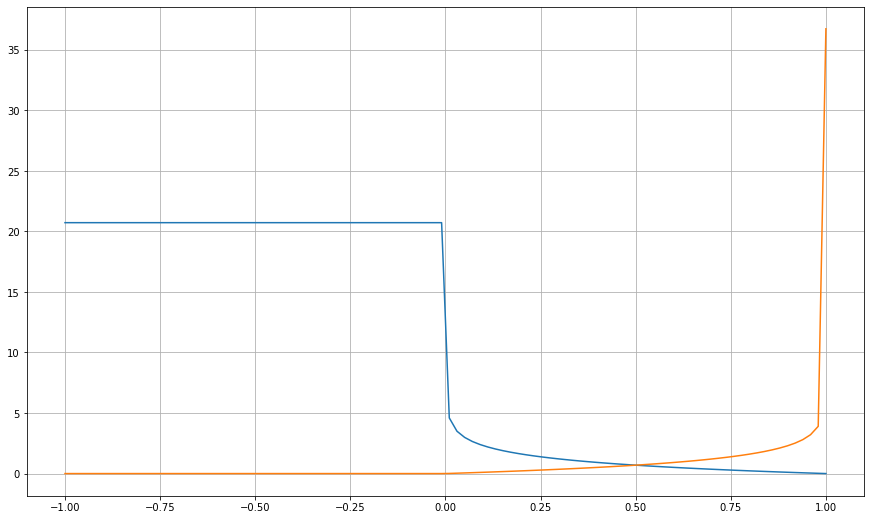

In [ ]:
# Проверка поведения log_loss при максимальных ошибках (1, 0) и (0, 1)
x = np.linspace(-1, 1, 100, dtype = np.float64 )
plt.figure(figsize = (15, 9))
plt.plot(x, [calc_logloss(1, xi) for xi in x])
plt.plot(x, [calc_logloss(0, xi) for xi in x])
plt.grid(True)


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    loglosses = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        loglosses.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W, loglosses

In [ ]:
def calc_norm_feat(x):
    res = ((x.T[:,1:] - x[1:].min(axis=1)) / (x[1:].max(axis=1) - x[1:].min(axis=1))).T
    return np.vstack((x[0], res))

In [ ]:
def calc_std_feat(x):
    res = ((x.T[:,1:] - x[1:].mean(axis=1)) / x[1:].std(axis=1)).T
    return np.vstack((x[0], res))

In [ ]:
# Метод масштабирования данных

def calc_data_scaling_feature(x, type_scaling = 0, def_value = 1):
    result = None
    if isinstance(x, np.ndarray):

        if x.ndim == 1: # для однострочного массива
            if np.where(x.max() - x.min() != 0):
                if type_scaling == 0: # normalize data
                    result = ((x - x.min()) / (x.max() - x.min()))
                else: # standardize data
                    result = (x - x.mean()) / x.std()
            else:
                result = x.copy()
        elif x.ndim == 2: # для многострочного 2D-массива
            i0 = i1 = 0
            ind0, = np.where(x.max(axis=1) - x.min(axis=1) == 0)
            ind, = np.where(x.max(axis=1) - x.min(axis=1) != 0)
            x_0 = (x.T[:,ind0] - x.T[:,ind0] + def_value).T
            if type_scaling == 0: # normalize data
                x_1 = ((x.T[:,ind] - x[ind].min(axis=1)) / (x[ind].max(axis=1) - x[ind].min(axis=1))).T
            else: # standardize data
                x_1 = ((x.T[:,ind] - x[ind].mean(axis=1)) / x[ind].std(axis=1)).T
            
            # "собирание" матрицы построчно
            for i in range(x.shape[0]):
                if i in ind0:
                    if result is None:
                        result = x_0[i0]
                    else:
                        result = np.vstack((result, x_0[i0]))
                    i0 += 1
                else:
                    if result is None:
                        result = x_1[i1]
                    else:
                        result = np.vstack((result, x_1[i1]))
                    i1 += 1
    return result

In [ ]:
# Масштабирование данных
# X_st = calc_data_scaling_feature(np.array([[6,6,6,6,6,6], [1,2,3,4,5,6], [1,2,3,4,5,6], [6,6,6,6,6,6], [1,2,3,4,5,6], [7,6,3,4,5,6], [6,6,6,6,6,6]]))
X_st = calc_data_scaling_feature(X.copy().astype(np.float64))


X_st
# (np.ones(x.shape[0])).tolist()

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

In [ ]:
def get_alpha(i, n):
    ii = 0
    for alpha in np.geomspace(1e-8, 20, n):
        ii += 1
        if i == ii:
            return alpha

In [ ]:
# Обучение модели

n_studies=30
iterations=5000
Ws = []
loglosses = []

for i in range(1, n_studies+2):
    if i == n_studies + 1:
        print('*************17.096')
        W, logloss = eval_model(X_st, y, iterations, 17.096)
    else:
        print(get_alpha(i, n_studies))
        W, logloss = eval_model(X_st, y, iterations, get_alpha(i, n_studies))
    Ws.append(W)
    loglosses.append(logloss)


1e-08
5000 [ 0.49670186 -0.13826984  0.64768084  1.52302454] 0.895327462519214
2.0927876908624165e-08
5000 [ 0.49668843 -0.1382759   0.64767244  1.52301872] 0.895321577097113
4.3797603190252456e-08
5000 [ 0.49666031 -0.13828857  0.64765484  1.52300656] 0.8953092605409336
9.165908484583684e-08
5000 [ 0.49660148 -0.13831509  0.64761801  1.5229811 ] 0.8952834862800794
1.9182300452108122e-07
5000 [ 0.49647836 -0.1383706   0.64754095  1.52292782] 0.8952295535657081
4.0144482268596444e-07
5000 [ 0.49622074 -0.13848674  0.64737968  1.52281634] 0.8951167159955615
8.401387834776318e-07
5000 [ 0.49568182 -0.13872976  0.64704225  1.52258308] 0.8948807116993146
1.758232104678113e-06
5000 [ 0.49455484 -0.13923814  0.64633633  1.5220952 ] 0.8943874211238156
3.6796065063494743e-06
5000 [ 0.49220019 -0.14030122  0.64486017  1.5210753 ] 0.8933577654081223
7.70063520370544e-06
5000 [ 0.48728937 -0.14252218  0.641776    1.51894593] 0.8912147020022869
1.6115794566136543e-05
5000 [ 0.47708636 -0.14715341  

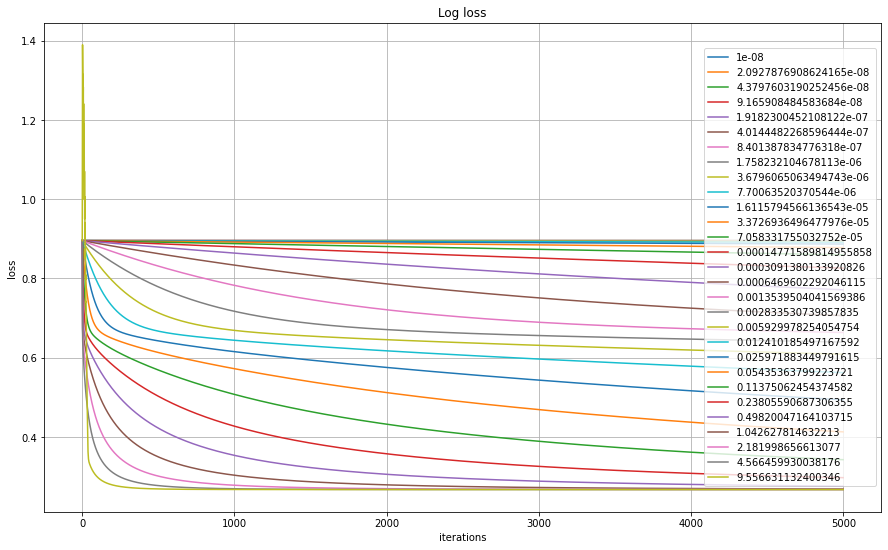

In [ ]:
plt.figure(figsize = (15, 9))
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
for i in range(0, n_studies-1):
    plt.plot(range(len(loglosses[i])), loglosses[i], label=get_alpha(i+1, n_studies))
plt.legend(loc='right')
plt.grid(True)

Наименьшие значения функция log loss показывает при 5000 итерациях и значениях alpha ~ 17.096

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [ ]:
def calc_pred_proba(W, X):
    z = np.dot(W.T, X)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [ ]:
y_pred_proba = calc_pred_proba(W, X_st)
W, X_st, y_pred_proba

(array([  2.09577831,  -6.4528207 , -21.78293384,  20.92209251]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
         0.        , 0.5       , 1.        , 0.1       , 0.2       ],
        [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
         0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
        [0.        , 0.        , 0.5       , 0.        , 0.5       ,
         0.        , 1.        , 1.        , 0.        , 0.5       ]]),
 array([0.67870371, 0.11275737, 0.99913352, 0.34129477, 0.03129423,
        0.0560966 , 0.99353765, 0.00538958, 0.81007479, 0.97171779]))

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [ ]:
def calc_pred(W, X, bin_threshold = 0.5):
    y_pred = calc_pred_proba(W, X)
    y_pred[y_pred > bin_threshold] = 1
    y_pred[y_pred <= bin_threshold] = 0
    return y_pred

In [ ]:
y_pred1 = calc_pred(W, X_st)
W, X_st, y_pred1

(array([  2.09577831,  -6.4528207 , -21.78293384,  20.92209251]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
         0.        , 0.5       , 1.        , 0.1       , 0.2       ],
        [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
         0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
        [0.        , 0.        , 0.5       , 0.        , 0.5       ,
         0.        , 1.        , 1.        , 0.        , 0.5       ]]),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]))

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [ ]:
# y =      np.array([0,   1,  1,   0,   1,   0,   1,   0,   1,   1], dtype = np.float64)
# y_pred = np.array([0.1, 0.2,  0.9, 0.2, 0.8, 0.1, 0.9, 0.2, 0.7, 0.8], dtype = np.float64)
y, y_pred

(array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1.]),
 array([0.1, 0.1, 0.9, 0.2, 0.8, 0.1, 0.9, 0.2, 0.7, 0.8]))

In [ ]:
# Метрики качества
def quality_metrics(y_true, y_pred, get_metrics = '*', bin_threshold = 0.5):
    # get_metrics = '*' - получение всех метрик: accuracy, matrix_errors, precision, recall, F_score
    # get_metrics = 'a'/'accuracy' - получение accuracy
    # get_metrics = 'm'/'matrix_errors' - получение matrix_errors
    # get_metrics = 'p'/'precision' - получение precision
    # get_metrics = 'r'/'recall' - получение recall
    # get_metrics = 'f'/'f_score' - получение f_score
    # get_metrics = 'tp' - получение TP
    # get_metrics = 'tn' - получение TN
    # get_metrics = 'fn' - получение FN
    # get_metrics = 'fp' - получение FP

    metrics = {}

    TP = ((y_true > bin_threshold) & (y_pred > bin_threshold)).sum()
    TN = ((y_true <= bin_threshold) & (y_pred <= bin_threshold)).sum()
    FN = ((y_true > bin_threshold) & (y_pred <= bin_threshold)).sum()
    FP = ((y_true <= bin_threshold) & (y_pred > bin_threshold)).sum()

    # accuracy - доля правильных ответов
    accuracy = (TP + TN) / y_true.shape[0]

    # матрица ошибок
    matrix_errors = np.array([[TP, FP],[FN, TN]])

    # precision
    precision = TP / (TP + FP)

    # recall
    recall = TP / (TP + FN)

    # recall
    f_score =  2 * precision * recall / (precision + recall)

    for m in get_metrics.split(','):
        m = m.strip()
        if m == '*':
            metrics['accuracy'] = accuracy
            metrics['matrix_errors'] = matrix_errors
            metrics['precision'] = precision
            metrics['recall'] = recall
            metrics['f_score'] = f_score
            break
        elif m == 'a' or m == 'accuracy':
            metrics['accuracy'] = accuracy
        elif m == 'm' or m == 'matrix_errors':
            metrics['matrix_errors'] = matrix_errors
        elif m == 'p' or m == 'precision':
            metrics['precision'] = precision
        elif m == 'r' or m == 'recall':
            metrics['recall'] = recall
        elif m == 'f' or m == 'f_score':
            metrics['f_score'] = f_score
        elif m == 'tp':
            metrics['TP'] = TP
        elif m == 'tn':
            metrics['TN'] = TN
        elif m == 'fn':
            metrics['FN'] = FN
        elif m == 'fp':
            metrics['FP'] = FP

    return metrics

In [ ]:
metrics = quality_metrics(y, y_pred)

print(f"accuracy={metrics['accuracy']:.3f}")
print(f"matrix_errors:\n{metrics['matrix_errors']}")
print(f"precision={metrics['precision']:.3f}")
print(f"recall={metrics['recall']:.3f}")
print(f"F_score={metrics['f_score']:.3f}")

accuracy=0.800
matrix_errors:
[[4 1]
 [1 4]]
precision=0.800
recall=0.800
F_score=0.800


6. Могла ли модель переобучиться? Почему?

In [ ]:
# y =      np.array([0,   1,  1,   0,   1,   0,   1,   0,   1,   1], dtype = np.float64)
# y_pred = np.array([0.1, 0.2,  0.9, 0.2, 0.8, 0.1, 0.9, 0.2, 0.7, 0.8], dtype = np.float64)
y, y_pred1

(array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1.]),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]))

In [ ]:
metrics = quality_metrics(y, y_pred1)

print(f"accuracy={metrics['accuracy']:.3f}")
print(f"matrix_errors:\n{metrics['matrix_errors']}")
print(f"precision={metrics['precision']:.3f}")
print(f"recall={metrics['recall']:.3f}")
print(f"F_score={metrics['f_score']:.3f}")

accuracy=0.800
matrix_errors:
[[4 1]
 [1 4]]
precision=0.800
recall=0.800
F_score=0.800


Как видно из последних расчитанных параметров (precision, recall, F_score) модель не изменилась, но могла переобучиться в следствие небольшого объема входных данных (10) и большого по отношению к объему данных количества признаков (4), а также из-за подобранных параметров (итерации и alpha) при минимальной log_loss на тренировочных данных. Однако, с другой стороны по косвенным признакам (получение небольших по модулю весов при признаках) переобученность модели не подтверждается. Для лучшей модели требуется больший набор данных.

7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [ ]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    loglosses = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        loglosses.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W, loglosses

In [ ]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    loglosses = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        loglosses.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W, loglosses

In [ ]:
n_studies=30
iterations=5000
lambda_ = 1e-5

W_l1, logloss_l1 = eval_model_l1(X_st, y, iterations, 17.096, lambda_)
W_l2, logloss_l2 = eval_model_l2(X_st, y, iterations, 17.096, lambda_)

# Ws_l1 = []
# loglosses_l1 = []
# Ws_l2 = []
# loglosses_l2 = []
# # Обучение модели
# for i in range(1, n_studies+2):
#     if i == n_studies + 1:
#         print('*************2.15')
#         W_l1, logloss_l1 = eval_model_l1(X_st, y, iterations, 2.15, lambda_)
#         W_l2, logloss_l2 = eval_model_l2(X_st, y, iterations, 2.15, lambda_)
#     else:
#         print(get_alpha(i, n_studies))
#         W_l1, logloss_l1 = eval_model_l1(X_st, y, iterations, get_alpha(i, n_studies), lambda_)
#         W_l2, logloss_l2 = eval_model_l2(X_st, y, iterations, get_alpha(i, n_studies), lambda_)
#     Ws_l1.append(W_l1)
#     loglosses_l1.append(logloss_l1)
#     Ws_l2.append(W_l2)
#     loglosses_l2.append(logloss_l2)

5000 [  2.08582169  -6.37488452 -21.74382787  20.85059576] 0.2671645677765154
5000 [  1.98297249  -5.7710072  -21.06461896  19.95420997] 0.26735113912156605


In [ ]:
y_pred_l1 = calc_pred(W_l1, X_st)
W_l1, X_st, y_pred_l1

(array([  2.08582169,  -6.37488452, -21.74382787,  20.85059576]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
         0.        , 0.5       , 1.        , 0.1       , 0.2       ],
        [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
         0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
        [0.        , 0.        , 0.5       , 0.        , 0.5       ,
         0.        , 1.        , 1.        , 0.        , 0.5       ]]),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]))

In [ ]:
y_pred_l2 = calc_pred(W_l2, X_st)
W_l2, X_st, y_pred_l2

(array([  1.98297249,  -5.7710072 , -21.06461896,  19.95420997]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
         0.        , 0.5       , 1.        , 0.1       , 0.2       ],
        [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
         0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
        [0.        , 0.        , 0.5       , 0.        , 0.5       ,
         0.        , 1.        , 1.        , 0.        , 0.5       ]]),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]))

In [ ]:
y, y_pred, y_pred1, y_pred_l1, y_pred_l2

(array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1.]),
 array([0.1, 0.1, 0.9, 0.2, 0.8, 0.1, 0.9, 0.2, 0.7, 0.8]),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]),
 array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1.]))

In [ ]:
# Метрики качества

TP = ((y > 0.5) & (y_pred_l2 > 0.5)).sum()
TN = ((y <= 0.5) & (y_pred_l2 <= 0.5)).sum()
FN = ((y > 0.5) & (y_pred_l2 <= 0.5)).sum()
FP = ((y <= 0.5) & (y_pred_l2 > 0.5)).sum()

print(f'TP={TP}')
print(f'TN={TN}')
print(f'FN={FN}')
print(f'FP={FP}')

TP=4
TN=4
FN=1
FP=1


In [ ]:
# accuracy - доля правильных ответов
accuracy = (TP + TN) / y.shape[0]

# матрица ошибок
matrix_errors = np.array([[TP, FP],[FN, TN]])

# precision
precision = TP / (TP + FP)

# recall
recall = TP / (TP + FN)

# recall
F_score =  2 * precision * recall / (precision + recall)

print(f'accuracy={accuracy:.3f}')
print(f'matrix_errors:\n{matrix_errors}')
print(f'precision={precision:.3f}')
print(f'recall={recall:.3f}')
print(f'F_score={F_score:.3f}')


accuracy=0.800
matrix_errors:
[[4 1]
 [1 4]]
precision=0.800
recall=0.800
F_score=0.800


К сожалению, в данном случае регуляризация не дала сколько-нибудь значимые результаты. Предсказанные ответы не изменились.